In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageTk
import tkinter.font as tkFont
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox
from fuzzywuzzy import process 
# Step 2: Load the dataset
data = pd.read_csv('imdb_top_1000.csv')  # Replace with your file path

# Display the first few rows to understand the structure
data.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Initial Data Summary:
                                               Poster_Link Series_Title  \
count                                                1000         1000   
unique                                               1000          999   
top     https://m.media-amazon.com/images/M/MV5BMTY5OD...     Drishyam   
freq                                                    1            2   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

       Released_Year Certificate  Runtime  Genre  IMDB_Rating  \
count           1000   

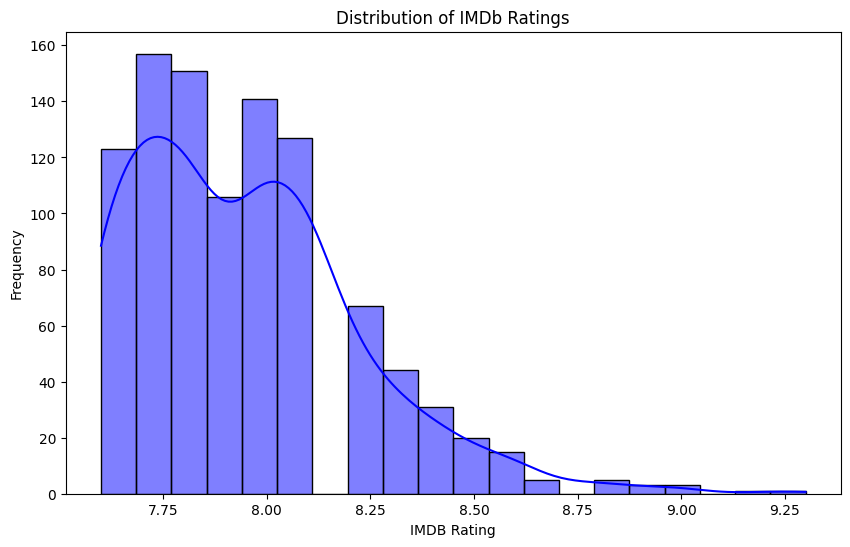

C:\Users\hf369\AppData\Local\Temp\ipykernel_1092\397663498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


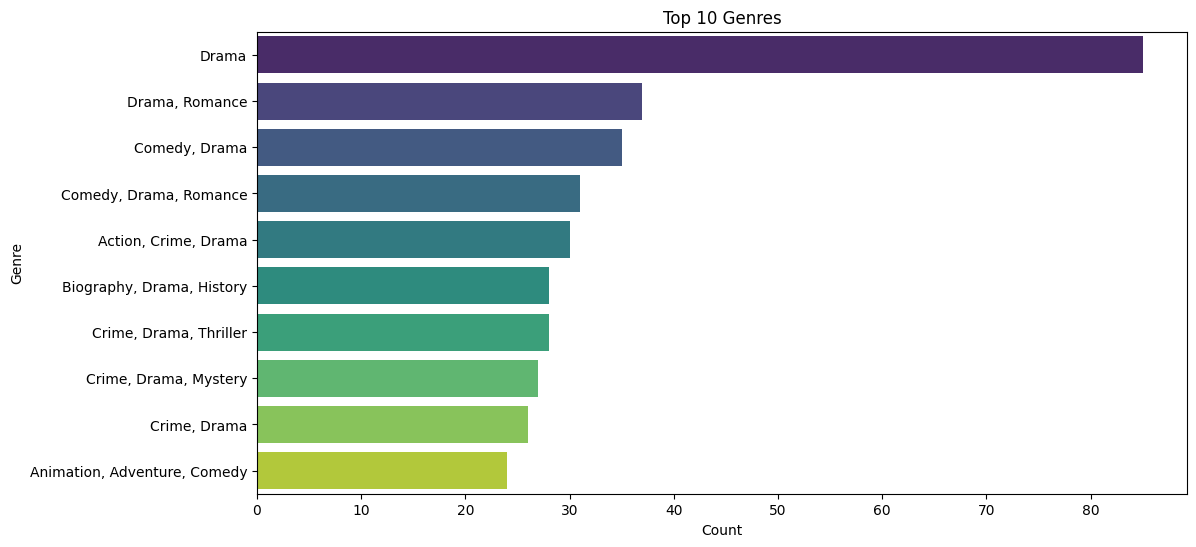

In [11]:
# Step 3: Initial Visualization

# Initial Data Summary
print("Initial Data Summary:\n", data.describe(include='all'))
print("\nMissing Values:\n", data.isnull().sum())

# Visualization: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['IMDB_Rating'], kde=True, bins=20, color='blue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

# Visualization: Top Genres
genre_counts = data['Genre'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [12]:
# Step 4: Preprocessing

# Dropping irrelevant columns
data = data.drop(columns=['Poster_Link', 'Overview', 'Meta_score', 'No_of_Votes', 'Gross'], errors='ignore')

# Renaming columns for clarity
data = data.rename(columns={
    'Series_Title': 'Name',
    'Released_Year': 'ReleaseYear',
    'Director': 'Realisation',
    'IMDB_Rating': 'Ratings'
})

# Filling missing values with appropriate placeholders
data['Genre'] = data['Genre'].fillna('Unknown')
data['Realisation'] = data['Realisation'].fillna('Unknown')
data['Ratings'] = data['Ratings'].fillna(data['Ratings'].mean())

# Cleaning and converting ReleaseYear to integers, handling non-numeric values
def clean_release_year(year):
    try:
        return int(year)
    except ValueError:
        return 0  # Replace non-numeric years with 0

data['ReleaseYear'] = data['ReleaseYear'].fillna('0').astype(str).apply(clean_release_year)

# Combining actors into a single column
data['Actors'] = data[['Star1', 'Star2', 'Star3', 'Star4']].apply(
    lambda x: ', '.join(x.dropna()), axis=1
)
data = data.drop(columns=['Star1', 'Star2', 'Star3', 'Star4'], errors='ignore')


In [13]:
print("Cleaned Data :")
print(data.head())
output_path = 'C:\\Users\\hf369\\OneDrive\\Desktop\\ids project\\cleaned_data.csv'  
data.to_csv(output_path, index=False)



Cleaned Data :
                       Name  ReleaseYear Certificate  Runtime  \
0  The Shawshank Redemption         1994           A  142 min   
1             The Godfather         1972           A  175 min   
2           The Dark Knight         2008          UA  152 min   
3    The Godfather: Part II         1974           A  202 min   
4              12 Angry Men         1957           U   96 min   

                  Genre  Ratings           Realisation  \
0                 Drama      9.3        Frank Darabont   
1          Crime, Drama      9.2  Francis Ford Coppola   
2  Action, Crime, Drama      9.0     Christopher Nolan   
3          Crime, Drama      9.0  Francis Ford Coppola   
4          Crime, Drama      9.0          Sidney Lumet   

                                              Actors  
0  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...  
1  Marlon Brando, Al Pacino, James Caan, Diane Ke...  
2  Christian Bale, Heath Ledger, Aaron Eckhart, M...  
3  Al Pacino, Robert De N

In [14]:
data['text_features'] = (
    data['Genre'].astype(str) + ' ' +
    data['Realisation'].astype(str) + ' ' +
    data['Actors'].astype(str)
)
# Feature extraction using TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
feature_matrix = tfidf.fit_transform(data['text_features'])

# Combine text and numerical features into a final feature matrix
numerical_features = data[['ReleaseYear', 'Ratings']].fillna(0).values
final_feature_matrix = pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names_out())
final_feature_matrix = final_feature_matrix.join(
    pd.DataFrame(numerical_features, columns=['ReleaseYear', 'Ratings'])
)

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(final_feature_matrix, final_feature_matrix)

def recommend_similar_movies(movie_title, similarity_matrix, movies_data, N=5):
    """Recommends similar movies based on a given movie title."""
    movies_data['Name'] = movies_data['Name'].str.strip()
    movie_title_clean = movie_title.strip().lower()
    
    # Case-insensitive match
    titles = movies_data['Name'].str.lower().tolist()
    
    if movie_title_clean not in titles:
        # Suggest closest title using fuzzy matching
        closest_match, score = process.extractOne(movie_title, movies_data['Name'].values)
        if score > 70:
            messagebox.showinfo("Did you mean?", f"Movie not found! Did you mean '{closest_match}'?")
            return recommend_similar_movies(closest_match, similarity_matrix, movies_data, N)
        else:
            return None
    
    movie_index = movies_data[titles == movie_title_clean].index[0]
    similar_movies_indices = pd.Series(similarity_matrix[movie_index])\
        .sort_values(ascending=False).iloc[1:N+1].index
    return movies_data.iloc[similar_movies_indices]
# Feature extraction using TfidfVectorizer for text features
tfidf = TfidfVectorizer(stop_words='english')
feature_matrix = tfidf.fit_transform(data['text_features'])

# Process Ratings to ensure they are numeric
data['Ratings'] = data['Ratings'].apply(
    lambda x: float(x.split('/')[0]) if isinstance(x, str) else x
)

# Include numerical features (release year and ratings)
numerical_features = data[['ReleaseYear', 'Ratings']].fillna(0).values

# Standardize numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

# Combine text and numerical features into a final feature matrix
final_feature_matrix = pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names_out())
final_feature_matrix = final_feature_matrix.join(
    pd.DataFrame(numerical_features, columns=['ReleaseYear', 'Ratings'])
)

# Applying KMeans clustering for movie grouping
kmeans = KMeans(n_clusters=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(final_feature_matrix)

def recommend_with_kmeans(movie_title, movies_data, feature_matrix, N=5):
    """Recommends movies using KMeans clustering."""
    try:
        # Find the index of the selected movie
        movie_index = movies_data[movies_data['Name'].str.casefold() == movie_title.casefold()].index[0]
    except IndexError:
        return None  # Movie not found

    # Get the cluster of the selected movie
    movie_cluster = movies_data.iloc[movie_index]['Cluster']
    cluster_movies = movies_data[movies_data['Cluster'] == movie_cluster]

    # If the cluster is too small, return empty DataFrame
    if len(cluster_movies) <= 1:
        return pd.DataFrame()

    # Calculate cosine similarity for all movies in the cluster
    cluster_indices = cluster_movies.index
    movie_features = feature_matrix.iloc[movie_index].to_numpy().reshape(1, -1)
    cluster_features = feature_matrix.iloc[cluster_indices].to_numpy()
    similarity_scores = cosine_similarity(movie_features, cluster_features).flatten()

    # Sort cluster movies by similarity
    cluster_movies['Similarity'] = similarity_scores
    cluster_movies = cluster_movies[cluster_movies.index != movie_index]
    sorted_movies = cluster_movies.sort_values(by='Similarity', ascending=False)

    # Return top N recommendations
    return sorted_movies.head(N)

def show_table_titles(movies):
    """Creates labels for each column title in a table and positions them on a canvas."""
    addCOL = 100
    for col_index, col_name in enumerate(movies.columns):
        label = tk.Label(text=col_name, font=tkFont.Font(size=16), fg='#888888')
        canvas.create_window(addCOL, 350, anchor=tk.NW, window=label)
        addCOL += 230

def show_table_Content(movies):
    """Displays the content of a table of movies on a canvas."""
    col = 350
    row = 100
    for index, movie in movies.iterrows():
        row = 100
        col += 50
        for col_index, col_value in enumerate(movie):
            label = tk.Label(text=str(col_value))
            canvas.create_window(row, col, anchor=tk.NW, window=label)
            if col_index == 3:
                row += 110
            row += 230
            current_movies_displayed.append(label)

def search():
    """Handles movie search and displays recommendations."""
    global current_movies_displayed

    # Clear previous movie labels
    for widget in current_movies_displayed:
        widget.destroy()

    chosen_movie_title = entry.get().strip()  # Get user input
    if not chosen_movie_title:
        error_label = tk.Label(text='Please enter a movie title.', font=tkFont.Font(size=16), fg='red')
        canvas.create_window(500, 250, anchor=tk.NW, window=error_label)
        return

    # Get recommendations
    recommended_movies = recommend_with_kmeans(chosen_movie_title, data, final_feature_matrix)
    if recommended_movies is None:
        error_label = tk.Label(text='Movie not found! Please try again.', font=tkFont.Font(size=16), fg='red')
        canvas.create_window(500, 250, anchor=tk.NW, window=error_label)
        return

    if recommended_movies.empty:
        error_label = tk.Label(text='No recommendations available for this movie.', font=tkFont.Font(size=16), fg='orange')
        canvas.create_window(500, 250, anchor=tk.NW, window=error_label)
        return

    # Display recommended movies
    recommended_movies = recommended_movies[['Name', 'Genre', 'Realisation', 'Actors', 'ReleaseYear', 'Ratings']]
    choice_film = tk.Label(text='Recommended movies based on this film:',
                           font=tkFont.Font(size=20), bg='#fff', fg='#094366')
    canvas.create_window(500, 300, anchor=tk.NW, window=choice_film)
    show_table_titles(recommended_movies)
    show_table_Content(recommended_movies)

def display_interface():
    """Creates the graphical user interface."""
    window = tk.Tk()
    window.geometry("1920x1080")
    img = tk.PhotoImage(file='icons.png', master=window)
    img_label = tk.Label(window, image=img)
    img_label.grid()
    background_image_pil = Image.open("./vector.png")
    background_image = ImageTk.PhotoImage(background_image_pil)
    global canvas
    canvas = tk.Canvas(window, width=1920, height=1080)
    canvas.grid(row=0, column=0)
    canvas.create_image(0, 0, anchor=tk.NW, image=background_image)
    canvas.lower(background_image)

    Recommendation = tk.Label(text='Recommendation System',
                               font=tkFont.Font(size=24), bg='#fff', fg='#094366')
    choice_film = tk.Label(text='Enter a movie title:', font=tkFont.Font(size=18))

    canvas.create_window(530, 5, anchor=tk.NW, window=Recommendation)
    canvas.create_window(700, 200, anchor=tk.CENTER, window=choice_film)

    global entry
    entry = tk.Entry(window, font=('Arial', 14), width=30)
    search_button = tk.Button(window, text='Search', font=('Arial', 12), bg='lightblue', fg='black', command=search)

    canvas.create_window(700, 260, anchor=tk.CENTER, window=entry)
    canvas.create_window(700, 300, anchor=tk.CENTER, window=search_button)

    window.mainloop()

current_movies_displayed = []
display_interface()

